## Importing Libraries

In [2]:
import numpy as np
import imageio as iio
import matplotlib.pyplot as plt
from scipy import ndimage

## Defining Function

In [3]:
def P(x):
    '''
    Implementing P(x) 
    '''
    y = x.copy()
    y[y<0] = 0
    return y

def scale(img):
    '''
    A function for scaling image between 0 and 255.
    '''
    return np.uint8((img-np.min(img))/(np.max(img)-np.min(img))*255)

def rep_filt(img, beta, size, n):
    '''
    A function for applying repetation filter with n steps.
    '''
    g = img.copy()
    f = img.copy()
    for i in range(n):
        f = P(f + beta*(g - ndimage.uniform_filter(f, size=size)))
    return scale(f)

## Applying Function

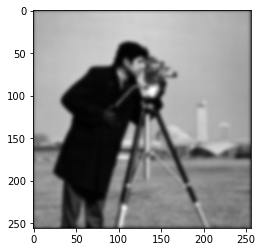

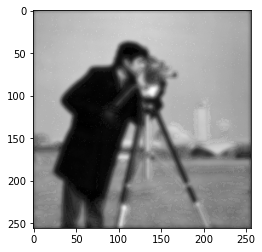

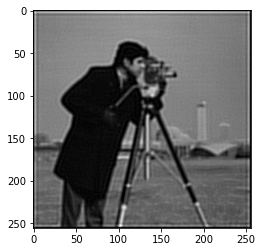

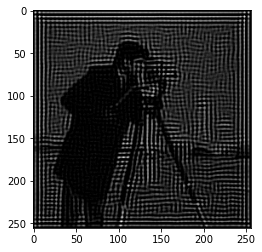

In [4]:
img = iio.imread('P2.tif')
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

out = rep_filt(img, 0.05, 7, 1)
plt.figure()
plt.imshow(out, cmap='gray')
plt.show()
iio.imwrite('Q2_1.png', out)

out = rep_filt(img, 0.05, 7, 100)
plt.figure()
plt.imshow(out, cmap='gray')
plt.show()
iio.imwrite('Q2_2.png', out)

out = rep_filt(img, 0.05, 7, 500)
plt.figure()
plt.imshow(out, cmap='gray')
plt.show()
iio.imwrite('Q2_3.png', out)

## Inverse Filter

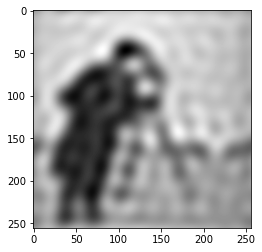

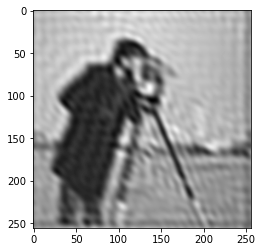

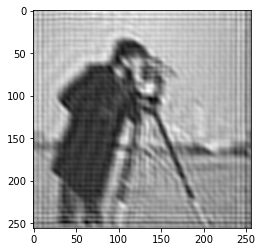

In [6]:
def fourier_uniform(img, size, cutoff):
    '''
    A function for calculating fourier transform of mean filter.
    '''
    F = np.fft.fft2(1/size**2*np.ones((size, size)), s=img.shape)
    F = np.fft.fftshift(F)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if (i-img.shape[0]//2)**2+(j-img.shape[1]//2)**2>=cutoff**2:
                F[i,j] = 0
    return F

def inverse_filter(img, size, delta, cutoff):
    x, y = img.shape
    F_hat = np.zeros(img.shape, dtype='complex')
    H = fourier_uniform(img, size, cutoff)
    G = np.fft.fftshift(np.fft.fft2(img))
    for i in range(x):
        for j in range(y):
            if H[i,j] < delta:
                F_hat[i,j] = 0
            else:
                F_hat[i,j] = G[i,j] / H[i,j]
    
    y = np.fft.ifft2(np.fft.ifftshift(F_hat))
    y = y.real
    return scale(y)

out = inverse_filter(img, 7, 1e-1, 10)
plt.figure()
plt.imshow(out, cmap='gray')
plt.show()
iio.imwrite('Q2_4.png', out)

out = inverse_filter(img, 7, 1e-1, 30)
plt.figure()
plt.imshow(out, cmap='gray')
plt.show()
iio.imwrite('Q2_5.png', out)

out = inverse_filter(img, 7, 1e-1, 50)
plt.figure()
plt.imshow(out, cmap='gray')
plt.show()
iio.imwrite('Q2_6.png', out)